In [2]:
import pandas as pd
import utils

TS = 48

samples = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
# samples = list(range(291, 301))
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)


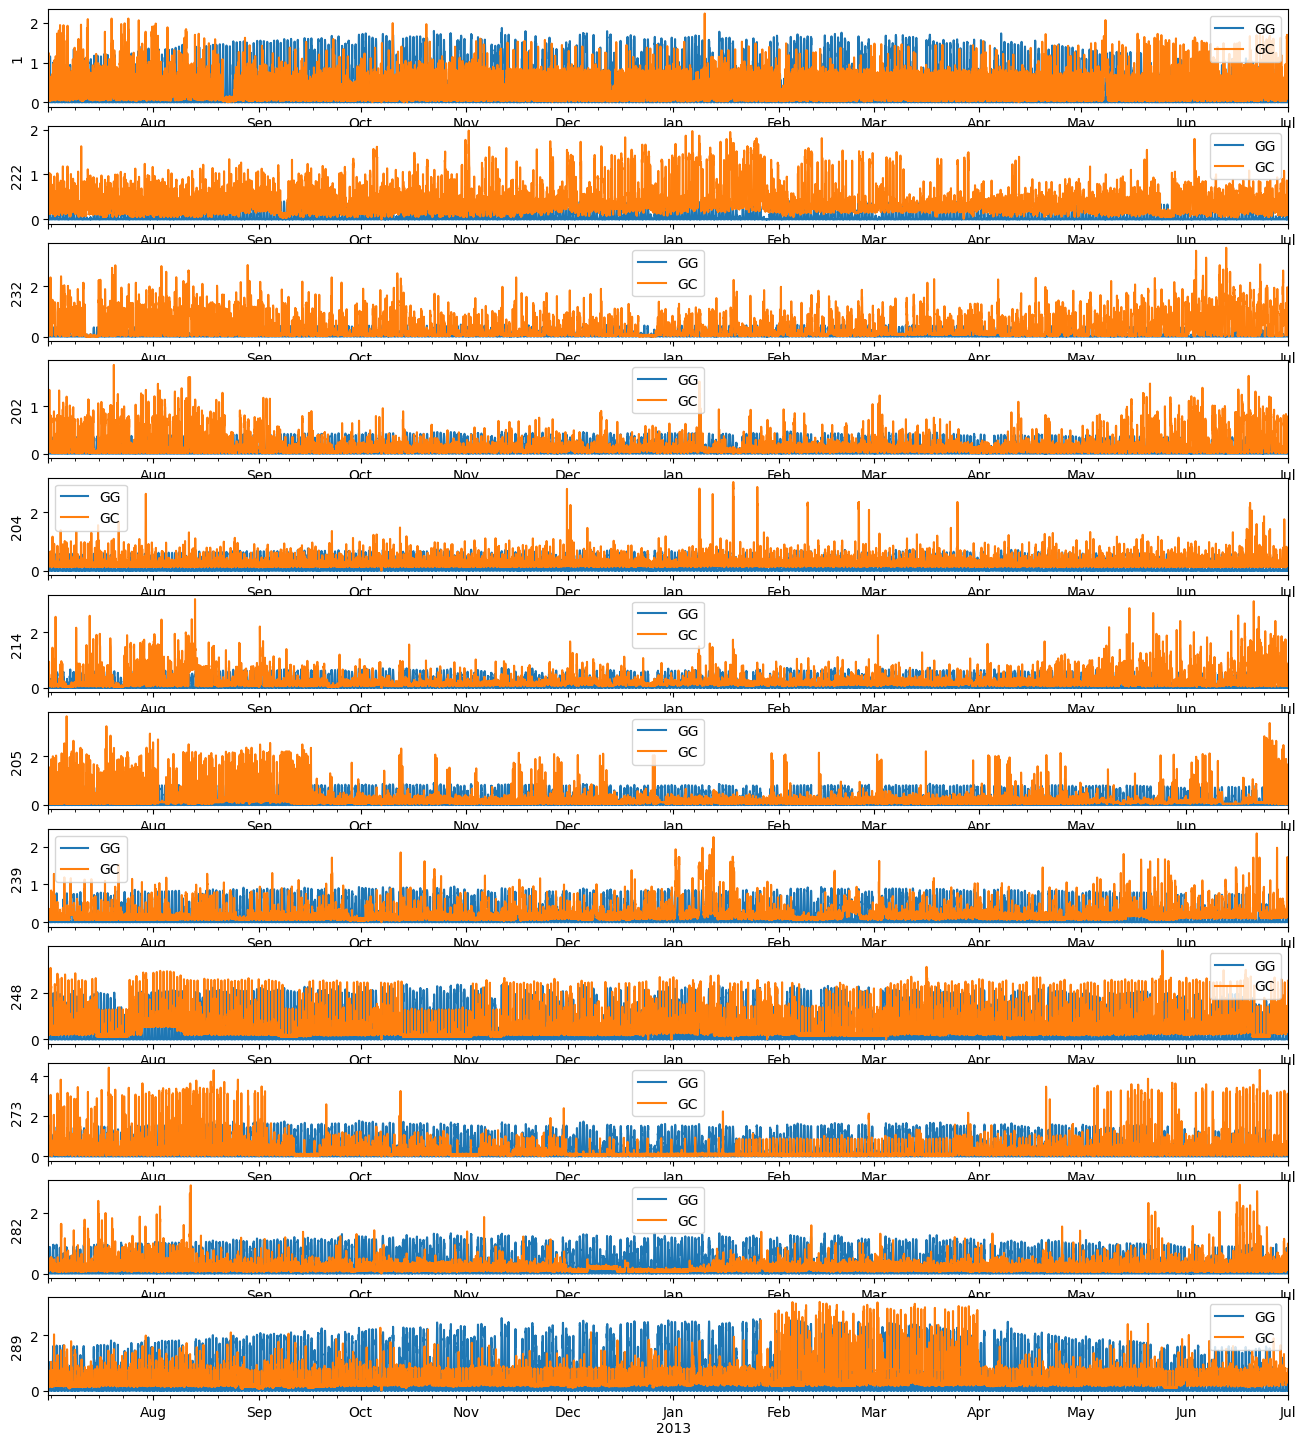

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df_raw), ncols=1, figsize=(16,18))
for i, df in enumerate(df_raw):
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(samples[i]))
    

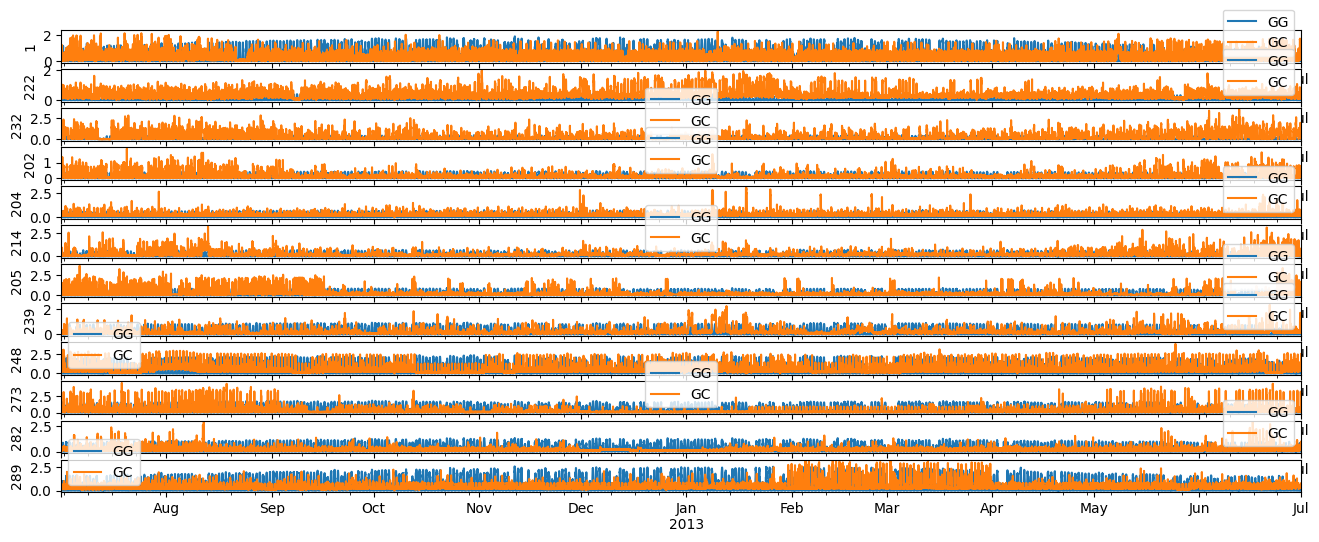

In [3]:
selected = samples #[1, 3, 8, 9]
# selected = [248, 282, 245]
df_sel = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, s in enumerate(selected):
    df = df_raw[samples.index(s)]
    df_sel.append(df)
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))

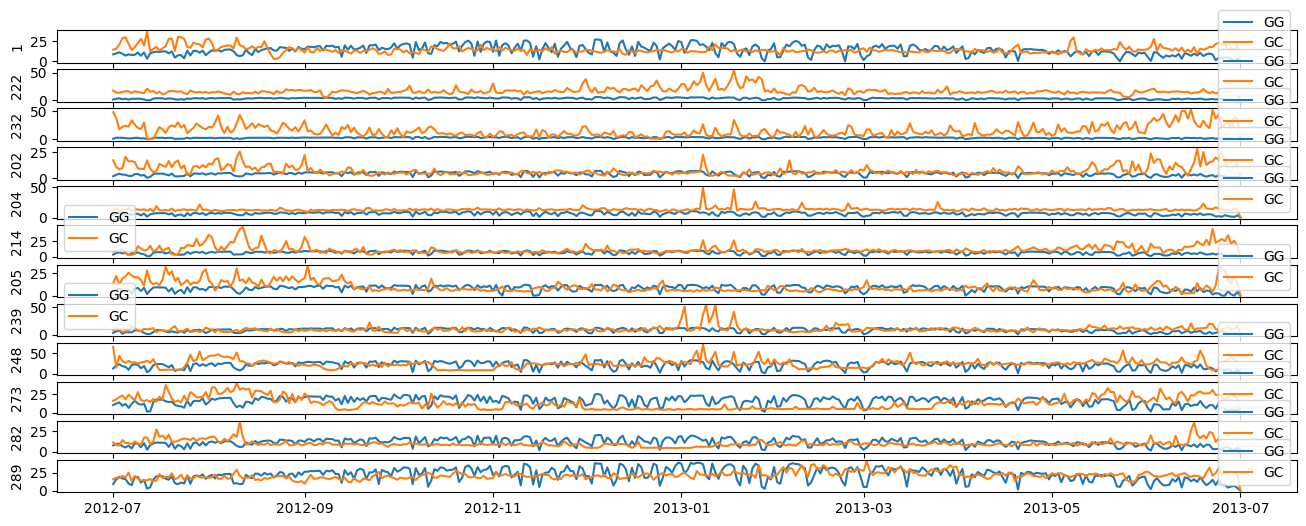

In [4]:
df_daily = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df1 = df.groupby(df.index.date).sum()
    df_daily.append(df1)
    df1[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))
    

68.3% -0.5952415710287773
86.6% -0.8975620426162253
95.0% -1.1998825142036733
scss 0.24605846840606838 0.23838402510358192
68.3% -0.03398542497627205
86.6% -0.19067476988449938
95.0% -0.3473641147927268
scss 0.8336669625441515 0.1695173835000906
68.3% -0.1924711070088328
86.6% -0.4218161353990939
95.0% -0.6511611637893551
scss 0.5315089213457167 0.09675092544592212
68.3% -0.18062947438285853
86.6% -0.3041881328071645
95.0% -0.4277467912314705
scss 0.4336571469764273 0.2515559532130772
68.3% -0.13301678888466034
86.6% -0.27110791734525536
95.0% -0.40919904580585037
scss 0.6091100843278195 0.2922594631229636
68.3% -0.2317117956056865
86.6% -0.4008113292532786
95.0% -0.5699108629008708
scss 0.5012219064007487 0.27637116039622056
68.3% -0.38338307112183084
86.6% -0.5925881626188193
95.0% -0.8017932541158078
scss 0.31804814224200195 0.2634690719934185
68.3% -0.2896278234743776
86.6% -0.4529776370380504
95.0% -0.6163274506017232
scss 0.4096907974708113 0.3354958498865718
68.3% -0.80194055372

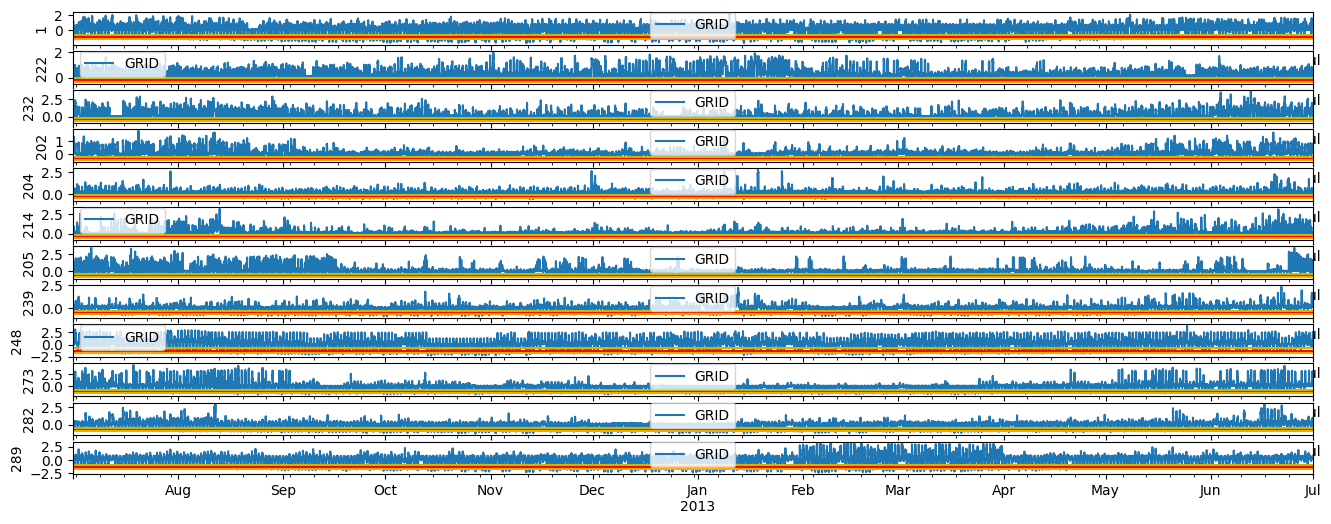

In [5]:
import numpy as np

fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df['GRID'] = df['GC'] - df['GG']
    df['PAT'] = np.where(df['GRID'] <= 0, 1, -1)
    
    gd_export = df[df['GRID']<0]['GRID'].sum()
    gd_import = df[df['GRID']>0]['GRID'].sum()
    df[['GRID']].plot(ax=axes[i])

    d_68 = df['GRID'].mean()-1.0*df['GRID'].std()
    d_86 = df['GRID'].mean()-1.5*df['GRID'].std()
    d_95 = df['GRID'].mean()-2.0*df['GRID'].std()
    print('68.3%', d_68)
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_68, color='y')
    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    
    axes[i].set_ylabel('{}'.format(s))
    sc = 1 + gd_export/df['GG'].sum()
    ss = 1 - gd_import/df['GC'].sum()
    print('scss', sc, ss)
    

In [5]:
import numpy as np
    
def sim_ss_sc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    return grid_imp, grid_exp


(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)

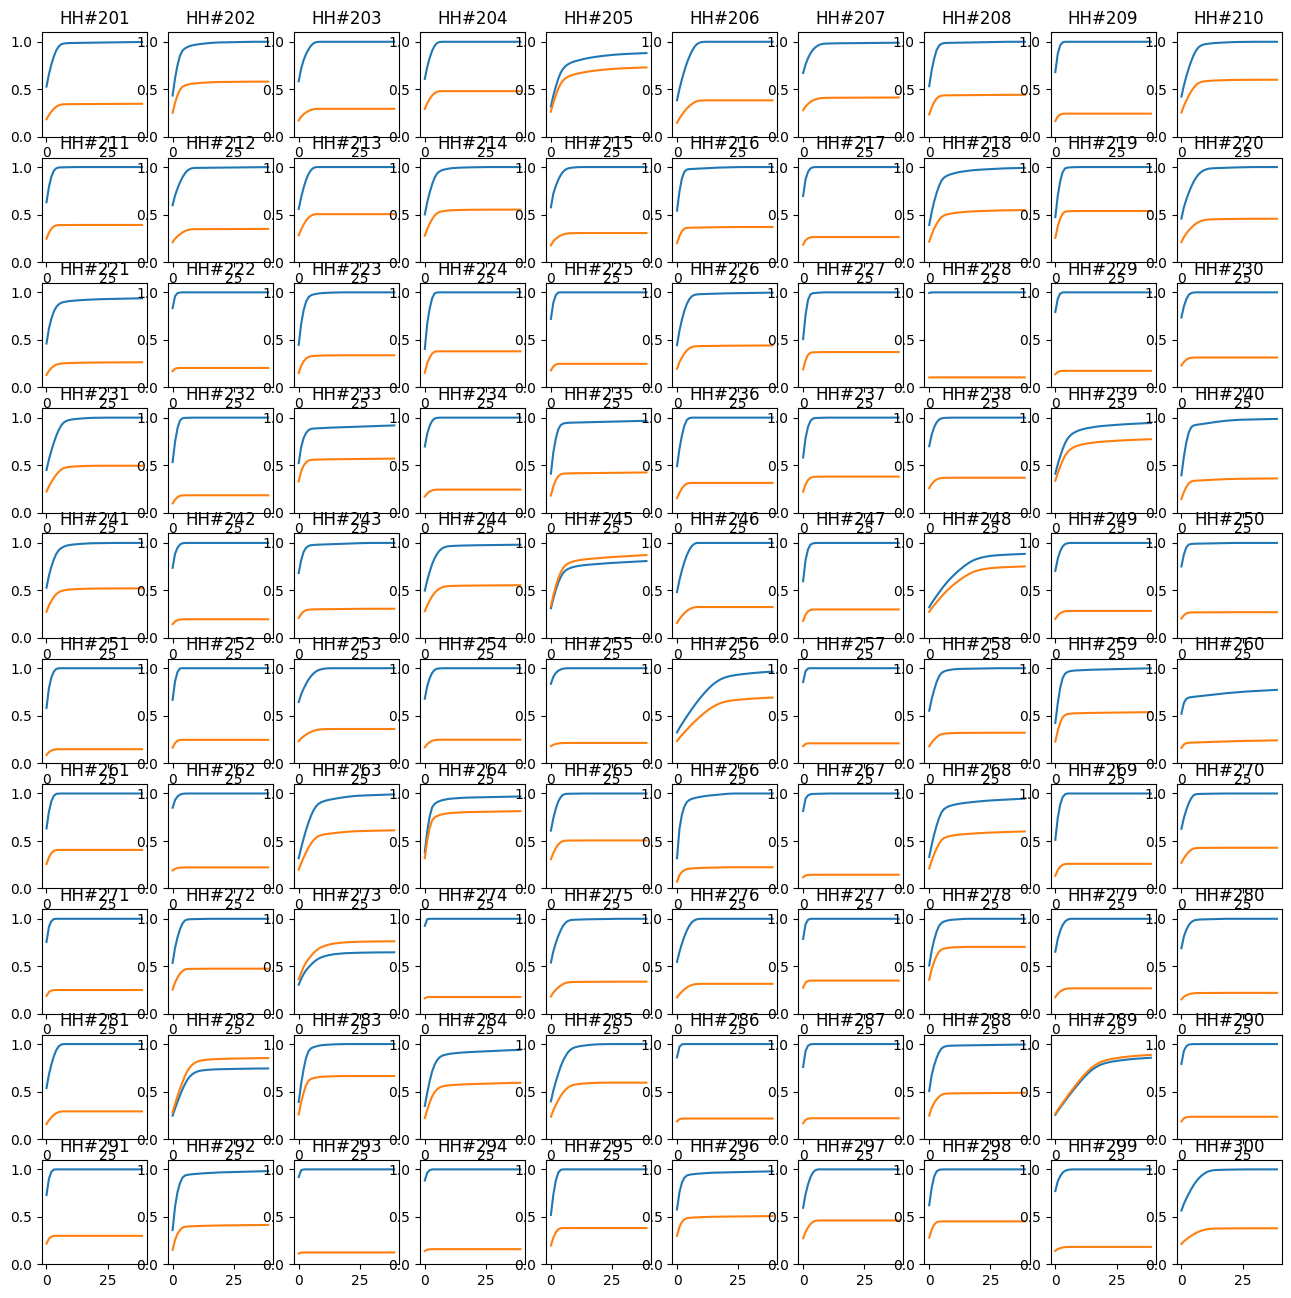

In [7]:
selected = list(range(201, 301))
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(16,16))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    sc_list = []
    ss_list = []
    for c in range(40):
        gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
        sc = 1 - gexp/df['GG'].sum()
        ss = 1 - gimp/df['GC'].sum()
        sc_list.append(sc)
        ss_list.append(ss)
    axes[i//10, i%10].plot(sc_list, label='SC')
    axes[i//10, i%10].plot(ss_list, label='SS')
    # axes[i//10, i%10].set_xlabel('Capacity[kwh]')
    # axes[i//10, i%10].set_ylabel('SC and SS[%]')
    axes[i//10, i%10].set_title(f'HH#{s}')
    # axes[i//10, i%10].legend()
    axes[i//10, i%10].set_ylim((0, 1.1))

(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
(17520, 2)
221 (0, 6, 12)
243 (-1, 5, 10)
232 (-2, 4, 10)
202 (3, 6, 9)
204 (-3, -1, 2)
214 (3, 7, 12)
205 (7, 11, 15)
239 (6, 10, 14)
248 (11, 19, 27)
273 (16, 22, 29)
282 (10, 14, 18)
289 (13, 19, 24)


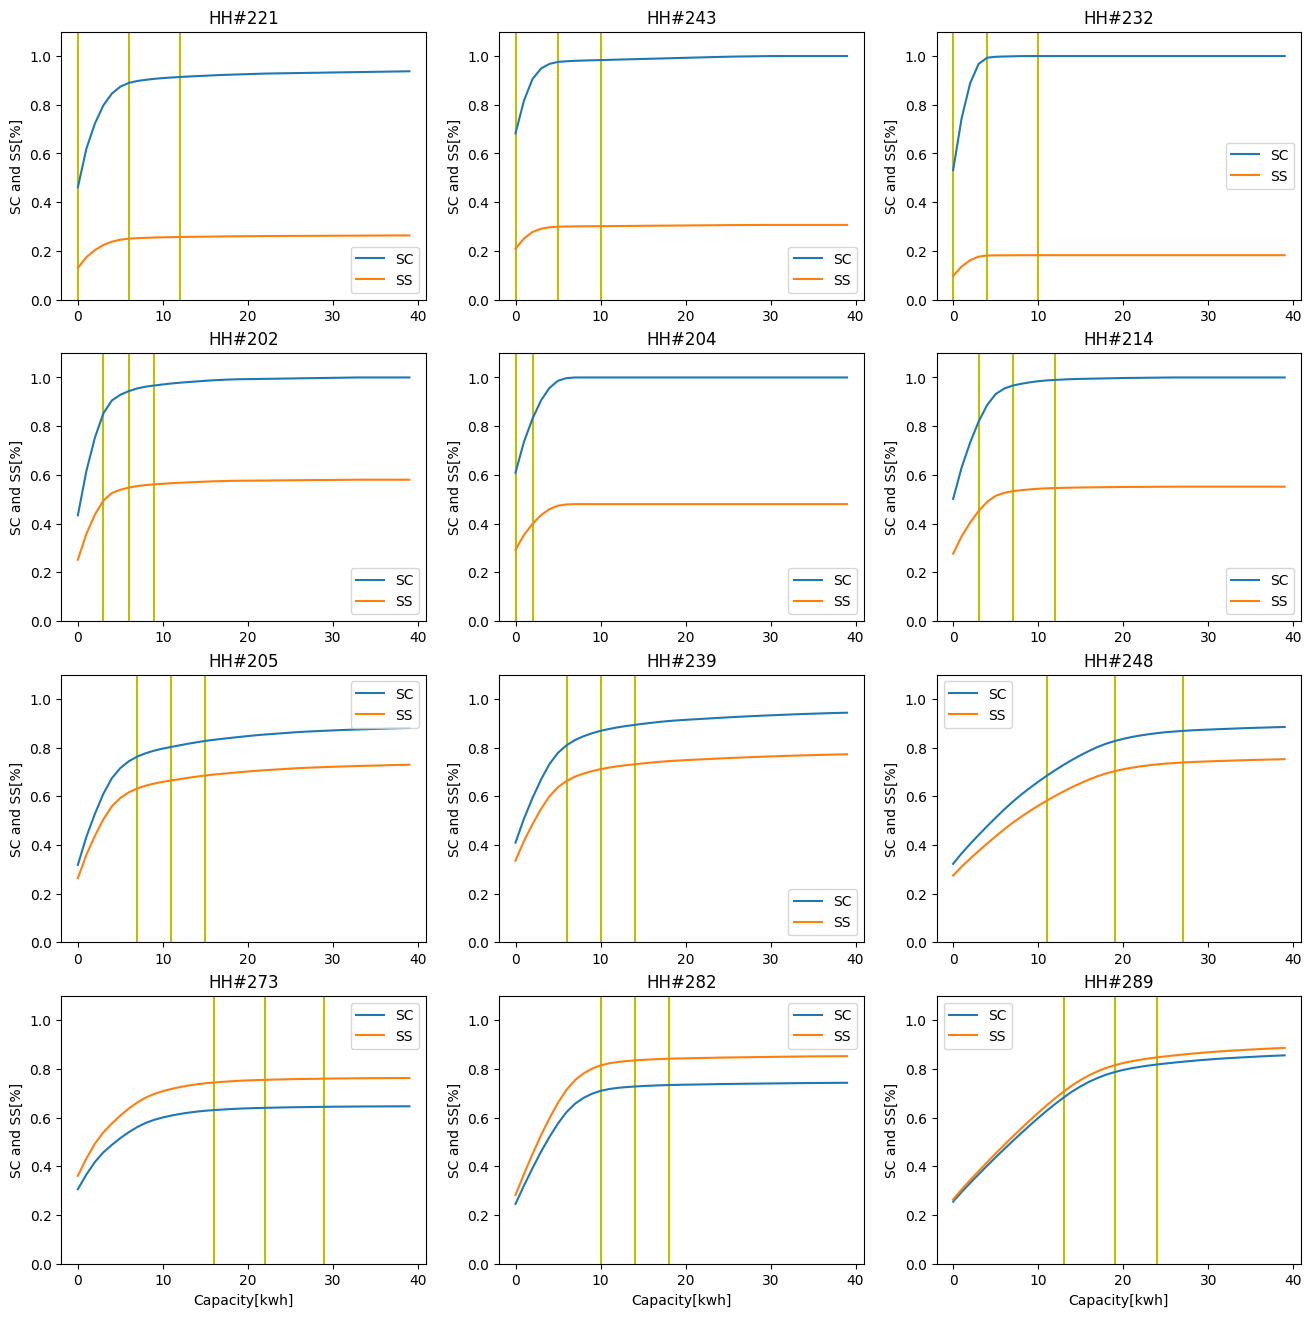

In [7]:
import matplotlib.pyplot as plt

selected = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    sc_list = []
    ss_list = []

    stds = utils.cal_stds(df)
    print(s, stds)
    for p in stds:
        axes[i//3, i%3].axvline(max(0,p), color='y')

    for c in range(40):
        gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
        sc = 1 - gexp/df['GG'].sum()
        ss = 1 - gimp/df['GC'].sum()
        sc_list.append(sc)
        ss_list.append(ss)
    axes[i//3, i%3].plot(sc_list, label='SC')
    axes[i//3, i%3].plot(ss_list, label='SS')
    axes[i//3, i%3].set_ylabel('SC and SS[%]')
    axes[i//3, i%3].set_title(f'HH#{s}')
    axes[i//3, i%3].legend()
    axes[i//3, i%3].set_ylim((0, 1.1))

    axes[-1, i%3].set_xlabel('Capacity[kwh]')


TypeError: string indices must be integers

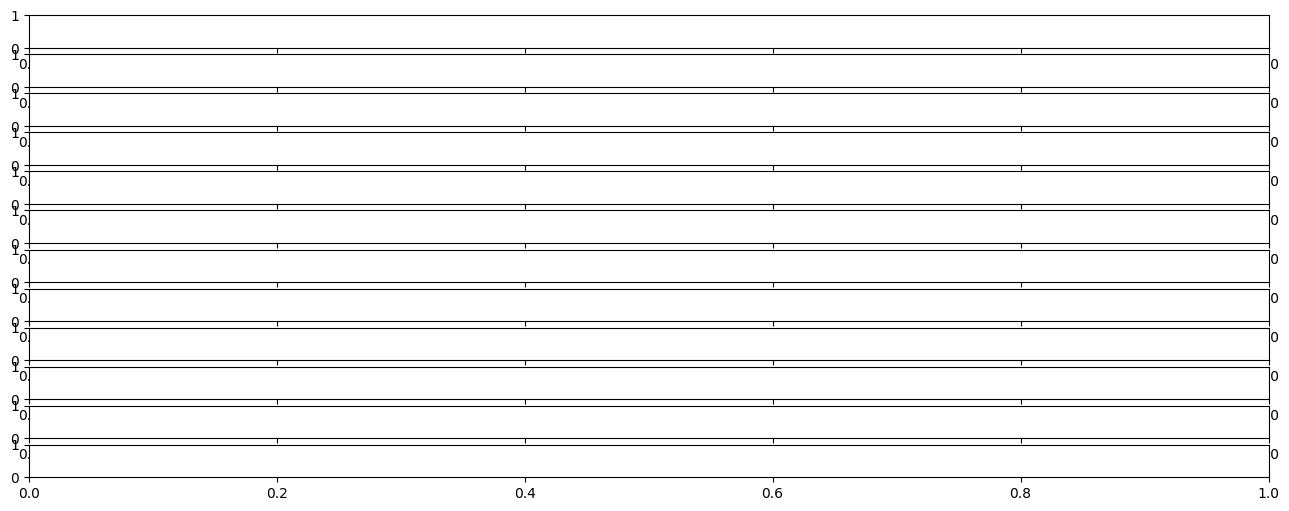

In [204]:
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_daily)):
    df['Diff'] = df['GG'] - df['GC']
    df['Diff'].plot(ax=axes[i])
    
    print('GG, GC, mean, std', df['GG'].mean(), df['GC'].mean(), df['Diff'].mean(), 1.5*df['Diff'].std())
    d_68 = df['Diff'].mean()+1.0*df['Diff'].std()
    d_86 = df['Diff'].mean()+1.5*df['Diff'].std()
    d_95 = df['Diff'].mean()+2.0*df['Diff'].std()
    print('68.3%', d_68)
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_68, color='y')
    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    axes[i].set_ylabel('{}'.format(s))

    df['D86'] = df['Diff'] - d_86
    print(df[df['Diff']>0]['Diff'].sum(), df['GG'].sum())
